# One-Hot and Label Encoding Techniques

This notebook demonstrates how to perform One-Hot Encoding and Label Encoding on categorical data using pandas and scikit-learn. We'll explore different encoding strategies and visualize their effects on customer data.

**Learning Objectives:**
- Understand the difference between One-Hot and Label Encoding
- Learn when to use each encoding technique
- Master scikit-learn preprocessing tools
- Visualize encoded data using custom table rendering

**Prerequisites:**
- Basic Python programming
- Familiarity with pandas and NumPy
- Understanding of categorical vs numerical data
- Basic knowledge of scikit-learn preprocessing

In [1]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## Step 1: Define Table Rendering Function

We'll create a helper function to display DataFrames as nicely formatted tables for better visualization.

In [2]:
def render_mpl_table(
        data: pd.DataFrame, col_width: float = 4.0, row_height: float = 0.625,
        font_size: int = 14, header_color: str = "#179E86",
        row_colors: list = ["#f1f1f2", "#ffffff"], edge_color: str = "black",
        bbox: list = [0, 0, 1, 1], header_font_color: str = "white",
        ax: plt.Axes = None, **kwargs) -> plt.Axes:
    """Function to display the DataFrame as a table with colored cells.

    Args:
        data (pd.DataFrame): The DataFrame to be displayed as a table.
        col_width (float, optional): The width of the columns. Defaults to 4.0.
        row_height (float, optional): The height of the rows. Defaults to 0.625.
        font_size (int, optional): The font size. Defaults to 14.
        header_color (str, optional): The color of the header. Defaults to
            "#179E86".
        row_colors (list, optional): The colors of the rows. Defaults to
            ["#f1f1f2", "#ffffff"].
        edge_color (str, optional): The color of the edges. Defaults to "black".
        bbox (list, optional): The bounding box. Defaults to [0, 0, 1, 1].
        header_font_color (str, optional): The color of the header font.
            Defaults to "white".
        ax (plt.Axes, optional): The axes to be used. Defaults to None.

    Returns:
        plt.Axes: The axes with the table.
    """

    # Create the figure and axes if not provided
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * \
            np.array([col_width, row_height])
        _, ax = plt.subplots(figsize=size)
        ax.axis("off")

    # Create the table
    mpl_table = ax.table(
        cellText=data.values, bbox=bbox,
        colLabels=data.columns, **kwargs
    )

    # Set the font size
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    # Styling the table
    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)

        # Header row
        if k[0] == 0:
            cell.set_text_props(weight="bold", color=header_font_color)
            cell.set_facecolor(header_color)

        # Alternate row coloring
        else:
            cell.set_facecolor(row_colors[k[0] % len(row_colors)])

    return ax

## Step 2: Create Sample Customer Data

We'll create a simple dataset with categorical variables that need encoding.

In [3]:
# Sample data: Customer segments and payment methods
data = {
    "Customer_ID": [1, 2, 3, 4, 5],
    "Segment": ["Youth", "Adult", "Senior", "Youth", "Senior"],
    "Payment_Method": ["Credit Card", "Debit Card", "Paypal", "Paypal", "Credit Card"]
}

df = pd.DataFrame(data)
print("Original Data:")
print(df)
print(f"\nData types:\n{df.dtypes}")
print(f"\nUnique values in Segment: {df['Segment'].unique()}")
print(f"Unique values in Payment_Method: {df['Payment_Method'].unique()}")

Original Data:
   Customer_ID Segment Payment_Method
0            1   Youth    Credit Card
1            2   Adult     Debit Card
2            3  Senior         Paypal
3            4   Youth         Paypal
4            5  Senior    Credit Card

Data types:
Customer_ID        int64
Segment           object
Payment_Method    object
dtype: object

Unique values in Segment: ['Youth' 'Adult' 'Senior']
Unique values in Payment_Method: ['Credit Card' 'Debit Card' 'Paypal']


## Step 3: Visualize Original Data

Let's display the original data using our custom table rendering function.

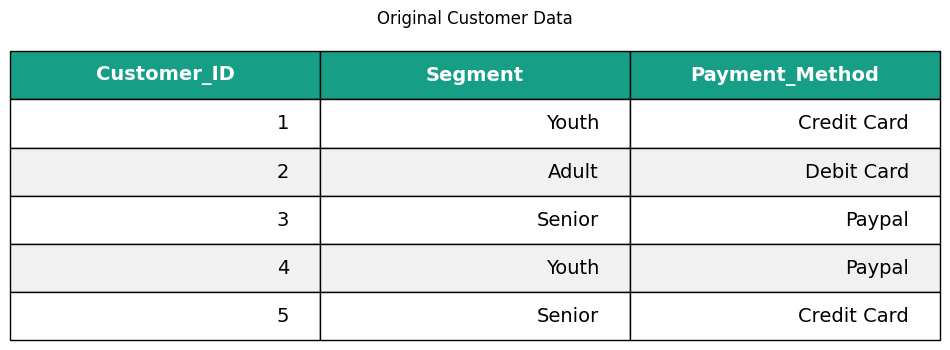

In [4]:
# Render the original data as a table
render_mpl_table(df)
plt.title("Original Customer Data", pad=20)
plt.show()

## Step 4: One-Hot Encoding Implementation

One-Hot Encoding creates binary columns for each category. Each category gets its own column with 1s and 0s.

In [5]:
# One-Hot Encoding using scikit-learn
one_hot_encoder_segment = OneHotEncoder(sparse_output=False)
one_hot_encoder_payment = OneHotEncoder(sparse_output=False)

# Apply One-Hot Encoding to Segment
segment_encoded = one_hot_encoder_segment.fit_transform(df[["Segment"]])
segment_feature_names = one_hot_encoder_segment.get_feature_names_out(["Segment"])

# Apply One-Hot Encoding to Payment_Method
payment_encoded = one_hot_encoder_payment.fit_transform(df[["Payment_Method"]])
payment_feature_names = one_hot_encoder_payment.get_feature_names_out(["Payment_Method"])

print("One-Hot Encoded Segment:")
print(f"Feature names: {segment_feature_names}")
print(f"Encoded values:\n{segment_encoded}")

print(f"\nOne-Hot Encoded Payment Method:")
print(f"Feature names: {payment_feature_names}")
print(f"Encoded values:\n{payment_encoded}")

One-Hot Encoded Segment:
Feature names: ['Segment_Adult' 'Segment_Senior' 'Segment_Youth']
Encoded values:
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]

One-Hot Encoded Payment Method:
Feature names: ['Payment_Method_Credit Card' 'Payment_Method_Debit Card'
 'Payment_Method_Paypal']
Encoded values:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


## Step 5: Create DataFrame with One-Hot Encoded Data

Let's create a comprehensive DataFrame that includes all the one-hot encoded features.

In [6]:
# Create DataFrame with One-Hot encoded data
df_one_hot = pd.DataFrame()
df_one_hot["Customer_ID"] = df["Customer_ID"]

# Add one-hot encoded segment columns
for i, col_name in enumerate(segment_feature_names):
    df_one_hot[col_name] = segment_encoded[:, i]

# Add one-hot encoded payment method columns
for i, col_name in enumerate(payment_feature_names):
    df_one_hot[col_name] = payment_encoded[:, i]

print("Data after One-Hot Encoding:")
print(df_one_hot)

Data after One-Hot Encoding:
   Customer_ID  Segment_Adult  Segment_Senior  Segment_Youth  \
0            1            0.0             0.0            1.0   
1            2            1.0             0.0            0.0   
2            3            0.0             1.0            0.0   
3            4            0.0             0.0            1.0   
4            5            0.0             1.0            0.0   

   Payment_Method_Credit Card  Payment_Method_Debit Card  \
0                         1.0                        0.0   
1                         0.0                        1.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         1.0                        0.0   

   Payment_Method_Paypal  
0                    0.0  
1                    0.0  
2                    1.0  
3                    1.0  
4                    0.0  


## Step 6: Visualize One-Hot Encoded Data

Let's visualize the one-hot encoded data using our table rendering function.

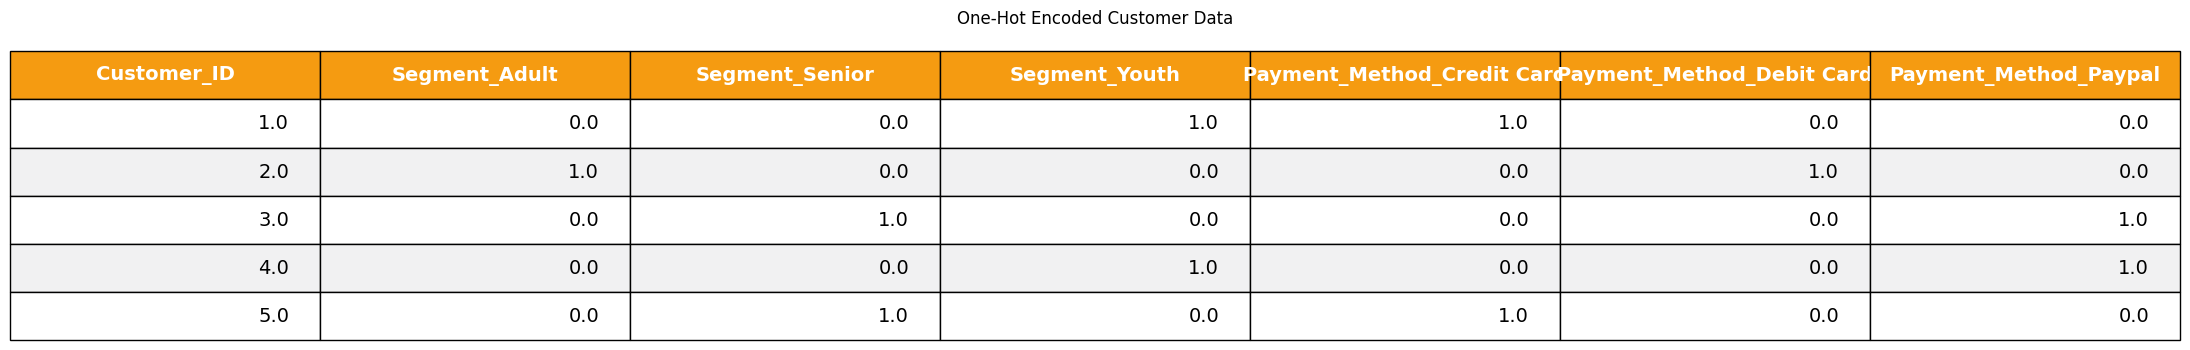

In [7]:
# Render the one-hot encoded data as a table
render_mpl_table(df_one_hot, header_color="#F59B11")
plt.title("One-Hot Encoded Customer Data", pad=20)
plt.show()

## Step 7: Label Encoding Implementation

Label Encoding converts each category to a unique integer. This is more compact but implies an ordinal relationship.

In [8]:
# Label Encoding using scikit-learn
label_encoder_segment = LabelEncoder()
label_encoder_payment = LabelEncoder()

df_label_encoded = df.copy()
df_label_encoded["Segment"] = label_encoder_segment.fit_transform(df["Segment"])
df_label_encoded["Payment_Method"] = label_encoder_payment.fit_transform(df["Payment_Method"])

print("Data after Label Encoding:")
print(df_label_encoded)

# Show the mapping
print(f"\nSegment Label Mapping:")
for i, label in enumerate(label_encoder_segment.classes_):
    print(f"  {label} -> {i}")

print(f"\nPayment Method Label Mapping:")
for i, label in enumerate(label_encoder_payment.classes_):
    print(f"  {label} -> {i}")

Data after Label Encoding:
   Customer_ID  Segment  Payment_Method
0            1        2               0
1            2        0               1
2            3        1               2
3            4        2               2
4            5        1               0

Segment Label Mapping:
  Adult -> 0
  Senior -> 1
  Youth -> 2

Payment Method Label Mapping:
  Credit Card -> 0
  Debit Card -> 1
  Paypal -> 2


## Step 8: Visualize Label Encoded Data

Let's visualize the label encoded data for comparison.

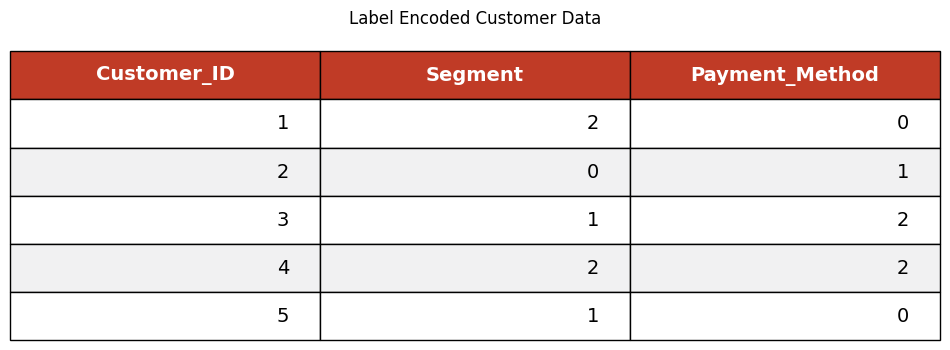

In [9]:
# Render the label encoded data as a table
render_mpl_table(df_label_encoded, header_color="#C03B26")
plt.title("Label Encoded Customer Data", pad=20)
plt.show()

## Step 9: Comparison and Analysis

Let's create a comprehensive comparison of all three approaches.

In [10]:
# Compare the three approaches
print("COMPARISON OF ENCODING METHODS")
print("="*50)

print("1. Original Data Shape:", df.shape)
print("2. One-Hot Encoded Shape:", df_one_hot.shape)
print("3. Label Encoded Shape:", df_label_encoded.shape)

print(f"\nMemory Usage Comparison:")
print(f"Original: {df.memory_usage(deep=True).sum()} bytes")
print(f"One-Hot: {df_one_hot.memory_usage(deep=True).sum()} bytes")
print(f"Label Encoded: {df_label_encoded.memory_usage(deep=True).sum()} bytes")

# Show feature expansion
print(f"\nFeature Expansion:")
print(f"Original features: {len(df.columns)}")
print(f"One-Hot features: {len(df_one_hot.columns)}")
print(f"Label Encoded features: {len(df_label_encoded.columns)}")

COMPARISON OF ENCODING METHODS
1. Original Data Shape: (5, 3)
2. One-Hot Encoded Shape: (5, 7)
3. Label Encoded Shape: (5, 3)

Memory Usage Comparison:
Original: 733 bytes
One-Hot: 412 bytes
Label Encoded: 252 bytes

Feature Expansion:
Original features: 3
One-Hot features: 7
Label Encoded features: 3


## Step 10: Practical Considerations

Let's demonstrate some practical considerations when choosing between encoding methods.

In [11]:
# Demonstrate pandas built-in one-hot encoding
df_pandas_onehot = pd.get_dummies(df, columns=["Segment", "Payment_Method"], prefix=["Seg", "Pay"])
print("Pandas One-Hot Encoding (get_dummies):")
print(df_pandas_onehot)

# Show how to handle new categories
print(f"\nHandling New Categories:")
print("="*30)

# Simulate new data with unseen category
new_data = pd.DataFrame({
    "Customer_ID": [6],
    "Segment": ["Child"],  # New category not in training
    "Payment_Method": ["Bitcoin"]  # New category not in training
})

print("New data with unseen categories:")
print(new_data)

# Try to transform with existing encoders (will cause issues)
try:
    new_segment_encoded = label_encoder_segment.transform(new_data["Segment"])
    print("Label encoder handled new category successfully")
except ValueError as e:
    print(f"Label encoder error: {e}")

# Show how to handle unknown categories
label_encoder_robust = LabelEncoder()
all_segments = list(df["Segment"].unique()) + ["Unknown"]
label_encoder_robust.fit(all_segments)
print(f"Robust encoder classes: {label_encoder_robust.classes_}")

Pandas One-Hot Encoding (get_dummies):
   Customer_ID  Seg_Adult  Seg_Senior  Seg_Youth  Pay_Credit Card  \
0            1      False       False       True             True   
1            2       True       False      False            False   
2            3      False        True      False            False   
3            4      False       False       True            False   
4            5      False        True      False             True   

   Pay_Debit Card  Pay_Paypal  
0           False       False  
1            True       False  
2           False        True  
3           False        True  
4           False       False  

Handling New Categories:
New data with unseen categories:
   Customer_ID Segment Payment_Method
0            6   Child        Bitcoin
Label encoder error: y contains previously unseen labels: 'Child'
Robust encoder classes: ['Adult' 'Senior' 'Unknown' 'Youth']


## Summary

In this notebook, we explored two fundamental categorical encoding techniques:

### One-Hot Encoding:
- **Purpose**: Creates binary columns for each category
- **When to use**: 
  - Nominal categorical variables (no inherent order)
  - When you want to avoid implying ordinal relationships
  - For tree-based algorithms that handle sparse features well
- **Pros**: 
  - No false ordinal relationships
  - Works well with linear models
  - Interpretable results
- **Cons**: 
  - Increases dimensionality (curse of dimensionality)
  - Can create sparse datasets
  - Memory intensive for high-cardinality features

### Label Encoding:
- **Purpose**: Maps each category to a unique integer
- **When to use**:
  - Ordinal categorical variables (natural order exists)
  - When memory/storage is a concern
  - For algorithms that can handle integer inputs well
- **Pros**:
  - Memory efficient
  - Maintains original number of features
  - Simple and fast
- **Cons**:
  - Implies ordinal relationship (can mislead algorithms)
  - May not work well with linear models
  - Sensitive to category ordering

### Key Decision Factors:

1. **Nature of Categories**: 
   - Use Label Encoding for ordinal data (Small, Medium, Large)
   - Use One-Hot Encoding for nominal data (Red, Blue, Green)

2. **Algorithm Choice**:
   - Tree-based models: Both work, One-Hot often preferred
   - Linear models: One-Hot Encoding usually better
   - Neural networks: One-Hot Encoding typically preferred

3. **Dataset Size**:
   - Small datasets: One-Hot Encoding usually fine
   - Large datasets with high cardinality: Consider Label Encoding or other techniques

4. **Cardinality**:
   - Low cardinality (< 10 categories): One-Hot Encoding
   - High cardinality (> 50 categories): Consider alternatives like Target Encoding

### Best Practices:
- Always fit encoders on training data only
- Handle unknown categories gracefully
- Consider the downstream algorithm when choosing encoding
- Monitor for data leakage in time-series data
- Use pandas `get_dummies()` for quick prototyping